In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#-----------------------------------
def stepFunction(t):
  if t >= 0: # 0 も Positiveとみなす
    return 1
  return 0

In [3]:
#-----------------------------------
def prediction(X, W, b):
  # 予測する
  pred_vec    = np.matmul(X, W) + b
  # スカラーに直す
  pred_scalar = pred_vec[0]
  # Step関数を適用する
  kai         = stepFunction(pred_scalar)
  return kai

In [4]:
#-----------------------------------
# Wとbの更新：1回分の処理コード
def perceptronStep(X, y, W, b, learn_rate=0.01):
  for i in range(len(X)):
    # 一つずつ値を予測する
    y_pred = prediction(X[i], W, b)

    # 誤分類<1> 予測=0 / 正解=1
    if (y_pred - y[i]) == -1:
      W[0] += X[i][0] * learn_rate
      W[1] += X[i][1] * learn_rate
      b    += learn_rate

    # 誤分類<2> 予測=1 / 正解=0
    elif (y_pred - y[i]) == 1:
      W[0] -= X[i][0] * learn_rate
      W[1] -= X[i][1] * learn_rate
      b    -= learn_rate

  return W, b

In [5]:
#-----------------------------------
# Wとbの更新： num_epochs 回分の処理コード
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
  # Wとbを初期化する
  x_min, x_max = min(X.T[0]), max(X.T[0])
  y_min, y_max = min(X.T[1]), max(X.T[1])
  W = np.array(np.random.rand(2, 1))
  b = np.random.rand(1)[0] + x_max

  # 出力用のデータ初期化
  boundary_lines = []

  # Wとbの更新： num_epochs 回分の処理コード
  for i in range(num_epochs):
    # Wとbの更新：1回分の処理コード
    W, b = perceptronStep(X, y, W, b, learn_rate)

    # 出力の説明
      # w0*x + w1*y + b = 0
      # y = - (w0/w1)*x - b/w1
    boundary_lines.append((-W[0] / W[1], -b / W[1]))

  return boundary_lines

In [6]:
#if __name__ == "__main__":
# 以下の方法では、ヘッダではない1行目が取得できない
# csv_data = pd.read_csv("data_quiz_09.csv")
# X = csv_data.iloc[:, :-1].values # 最後の列の1個手前まで
# y = csv_data.iloc[:,-1].values   # 最後の列を指定

# csvデータの読み込み : ここでは、ともに1列のデータ
csv_data = np.loadtxt("data_quiz_09.csv", delimiter=',')
X = csv_data[:, :-1]
y = csv_data[:, -1]
print(y)
boundary_lines = trainPerceptronAlgorithm(X,y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


最適化過程　を　全てプロット


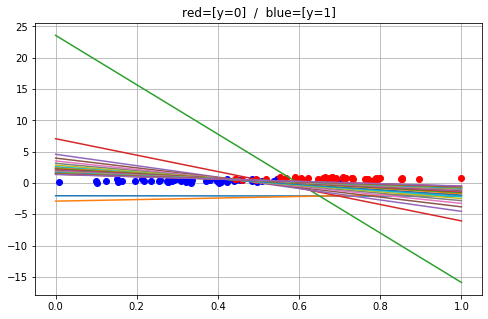

In [7]:
#=======================================================
plt.rcParams['figure.figsize'] = (8,5)
plt.figure()

# 入力データをプロット
for i, tmp_y in enumerate(y):
    if tmp_y == 0:
        plt.plot(X[i, 0], X[i, 1], 'ro')

    else:
        plt.plot(X[i, 0], X[i, 1], 'bo')

# 予測した直線をプロット
for i in range(len(boundary_lines)):
    x_data = [0, 1]
    y_data = boundary_lines[i][0] * x_data + boundary_lines[i][1]
    plt.plot(x_data, y_data)

# その他の処理
plt.grid();
plt.title("red=[y=0]  /  blue=[y=1]");
# plt.ylim(-2, 1.5);

print("最適化過程　を　全てプロット")

C:\Users\mbd_p\Anaconda3\envs\UdaCity_01_Intro_ML\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\mbd_p\Anaconda3\envs\UdaCity_01_Intro_ML\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


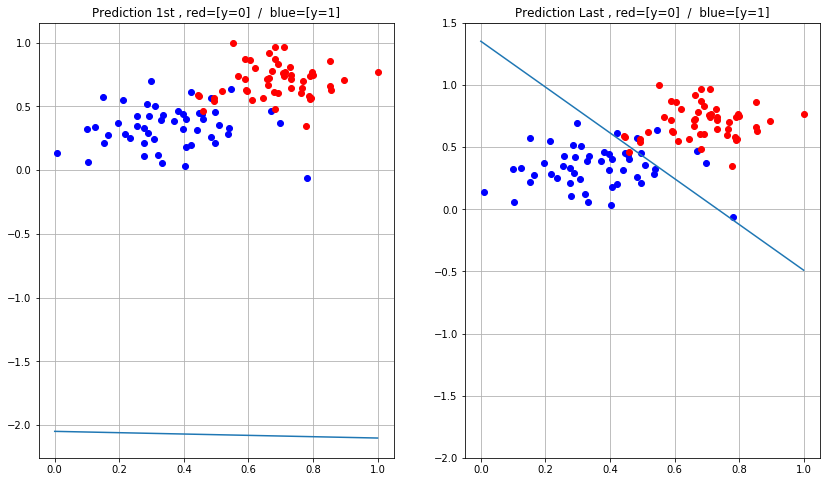

In [8]:
# =======================================================
plt.rcParams['figure.figsize'] = (14,8)
plt.figure()

for j in range(2):
    # 入力データをプロット
    plt.subplot(1,2,j+1)
    #
    for i, tmp_y in enumerate(y):
        if tmp_y == 0:
            plt.plot(X[i, 0], X[i, 1], 'ro')

        else:
            plt.plot(X[i, 0], X[i, 1], 'bo')
# =======================================================
# 予測した直線をプロット - 1st
plt.subplot(1,2,1)
i = 0
x_data = [0, 1]
y_data = boundary_lines[i][0] * x_data + boundary_lines[i][1]
plt.plot(x_data, y_data)

# その他の処理
plt.grid();
plt.title("Prediction 1st , red=[y=0]  /  blue=[y=1]");
# plt.ylim(-2, 1.5);
# =======================================================
# 予測した直線をプロット - Last
plt.subplot(1,2,2)
i = -1
x_data = [0, 1]
y_data = boundary_lines[i][0] * x_data + boundary_lines[i][1]
plt.plot(x_data, y_data)

# その他の処理
plt.grid();
plt.title("Prediction Last , red=[y=0]  /  blue=[y=1]");
plt.ylim(-2, 1.5);
# =======================================================